<a href="https://colab.research.google.com/github/EngRenan/Data-Analysis---Exploratory/blob/main/Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Importando libs necessarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [19]:
#Carregando dataframe
df = pd.read_excel('/content/Levantamento dos dados_2.xlsx')

#Extraindo primeiras linhas
df.head()

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,QM,PN,Descrição PN,Descrição CTO,Emissão QM,Grupo Código Causa,Área CTO,Área - CTA,Tipo QM,Data abertura,...,Programa,Tamanho peça,Tipo do desvio,Reg afetada peça,Reg Marca batida,Nível peça,Geometria peça,Material\n,Embalagem,Qtd
0,200133459,170-70154-005,"HASTE SUPERIOR-HASTE PRINCIPAL, TDPP",Pintura,2022-05-09,Fabricação EDE,Tratamentos,Tratamentos,OP,2022-05-09,...,SUBC - 170 E1 - F2,Média,Risco,Interna,Extremidade,Primário,Complexa,Alumínio,Dispositivo,1
1,200131495,190-70470-301QB10,"CAME, INFERIOR-PERNA FORCA TDPA",Logística,2022-01-24,Fabricação EDE,Logística,Logística,LO,2022-01-24,...,SUBC - 190 E1 - F4,Média,Batida,Externa,Extremidade,Primário,Complexa,Alumínio,PB+PP,1
2,200132483,170-70262-003,"HASTE SECUNDARIA INF, HASTE SEC TDPP",Logística,2022-03-17,Fabricação EDE,Logística,Logística,LO,2022-03-17,...,SUBC - 170 E1 - F2,Pequena,Batida,Externa,Extremidade,Primário,Complexa,Alumínio,PP+PB,1
3,200131518,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,CENTRO TORN. WFL 1 M120,2022-01-26,Fabricação EDE,Usinagem - UPG,Usinagem - UPG,OP,2022-01-26,...,SCONJ - 170 E1,Grande,Risco,Externa,Extremidade,Subconjunto/Componente,Complexa,Alumínio,Dispositivo,1
4,200131544,170-70406-403,MUNHÃO CONJUNTO-PERNA FORÇA TDPN,Inspeção DEA,2022-01-27,Fabricação EDE,Usinagem - UPP,Tratamentos,OP,2022-01-27,...,SCONJ - 170 E1,Pequena,Risco,Interno,Meio,Subconjunto/Componente,Complexa,Alumínio,Dispositivo,1


In [20]:
#Extraindo ultimas linhas
df.tail()

,QM,PN,Descrição PN,Descrição CTO,Emissão QM,Grupo Código Causa,Área CTO,Área - CTA,Tipo QM,Data abertura,...,Programa,Tamanho peça,Tipo do desvio,Reg afetada peça,Reg Marca batida,Nível peça,Geometria peça,Material\n,Embalagem,Qtd
361,200137596,ZTER-196-32185-035,"PINO DE CIS,MUNHAO-ASA,INOX",Passivação,2022-11-24,Fabricação EDE,Tratamentos,Tratamentos,OP,2022-11-24,...,TER-INDUSTRIALIZAÇ,Pequena,Batida,Externa,Meio,Subconjunto/Componente,Cilíndrica,aço inox,PP,1
362,200134913,ZTER-196-32216-035,"PINO DE CIS,MUNHAO-ASA,INOX",YABORA INDUSTRIA AERONAUTICA SA,2022-07-22,Fabricação EDE,sitesEMBRAER,Tratamentos,OP,2022-07-22,...,TER-Industrializaç,Pequena,Risco,Externa,Extremidade,Primário,Cilíndrica,aço inox,PP,1
363,200136881,ZTER-196-32216-035,"PINO DE CIS,MUNHAO-ASA,INOX",Abast. e Transp. Interno de Mat.,2022-10-20,Fabricação EDE,PPCP EDE,Tratamentos,OP,2022-10-20,...,TER-INDUSTRIALIZAÇ,Pequena,Batida,N/D,Extremidade,Primário,Cilíndrica,aço inox,PP,1
364,200134046,ZTER-550-15679-001,PARAFUSO-CABECA SEXT.3125-24 UNJF 2A,YABORA INDUSTRIA AERONAUTICA S,2022-06-07,Fabricação EDE,sitesEMBRAER,Tratamentos,OP,2022-06-07,...,TER-Industrializaç,Pequena,Risco,Externa,Meio,Primário,Cilíndrica,Aluminio,PP,1
365,200133850,ZTER-550-15679-001,PARAFUSO-CABECA SEXT.3125-24 UNJF 2A,AJUSTAGEM VALV,2022-05-26,Fabricação EDE,Usinagem - UPP,Tratamentos,OP,2022-05-26,...,TER-Industrializaç,Pequena,Risco,Externa,Meio,N/D,N/D,Aluminio,PP,1


In [21]:
#Verificando shape
df.shape

(366, 23)

In [22]:
#Verificando tamanho
df.size

8418

In [23]:
#Checando valores nulos
df.isnull().sum()

QM                    0
PN                    0
Descrição PN          0
Descrição CTO         0
Emissão QM            0
Grupo Código Causa    0
Área CTO              0
Área - CTA            0
Tipo QM               0
Data abertura         0
Data encerramento     0
Aging da nota         0
Material              0
Programa              0
Tamanho peça          1
Tipo do desvio        4
Reg afetada peça      0
Reg Marca batida      0
Nível peça            0
Geometria peça        0
Material\n            0
Embalagem             0
Qtd                   0
dtype: int64

In [24]:
# Obtendo estatísticas descritivas básicas para cada coluna numérica
df.describe()

,QM,Aging da nota,Material,Qtd
count,3.660000e+02,366.000000,3.660000e+02,366.0
mean,2.001346e+08,46.409836,9.080442e+06,1.0
std,1.851340e+03,59.677088,2.160897e+06,0.0
min,2.001315e+08,0.000000,1.345610e+06,1.0
25%,2.001331e+08,9.000000,1.001843e+07,1.0
50%,2.001346e+08,21.000000,1.004068e+07,1.0
75%,2.001361e+08,60.000000,1.005995e+07,1.0
max,2.001381e+08,356.000000,1.008872e+07,1.0


In [25]:
#Checando valores
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   QM                  366 non-null    int64         
 1   PN                  366 non-null    object        
 2   Descrição PN        366 non-null    object        
 3   Descrição CTO       366 non-null    object        
 4   Emissão QM          366 non-null    datetime64[ns]
 5   Grupo Código Causa  366 non-null    object        
 6   Área CTO            366 non-null    object        
 7   Área - CTA          366 non-null    object        
 8   Tipo QM             366 non-null    object        
 9   Data abertura       366 non-null    datetime64[ns]
 10  Data encerramento   366 non-null    datetime64[ns]
 11  Aging da nota       366 non-null    int64         
 12  Material            366 non-null    int64         
 13  Programa            366 non-null    object        

In [27]:
#Convertendo dtype das colunas
df['QM'] = df['QM'].astype('object')
df['Material'] = df['Material'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   QM                  366 non-null    object        
 1   PN                  366 non-null    object        
 2   Descrição PN        366 non-null    object        
 3   Descrição CTO       366 non-null    object        
 4   Emissão QM          366 non-null    datetime64[ns]
 5   Grupo Código Causa  366 non-null    object        
 6   Área CTO            366 non-null    object        
 7   Área - CTA          366 non-null    object        
 8   Tipo QM             366 non-null    object        
 9   Data abertura       366 non-null    datetime64[ns]
 10  Data encerramento   366 non-null    datetime64[ns]
 11  Aging da nota       366 non-null    int64         
 12  Material            366 non-null    object        
 13  Programa            366 non-null    object        

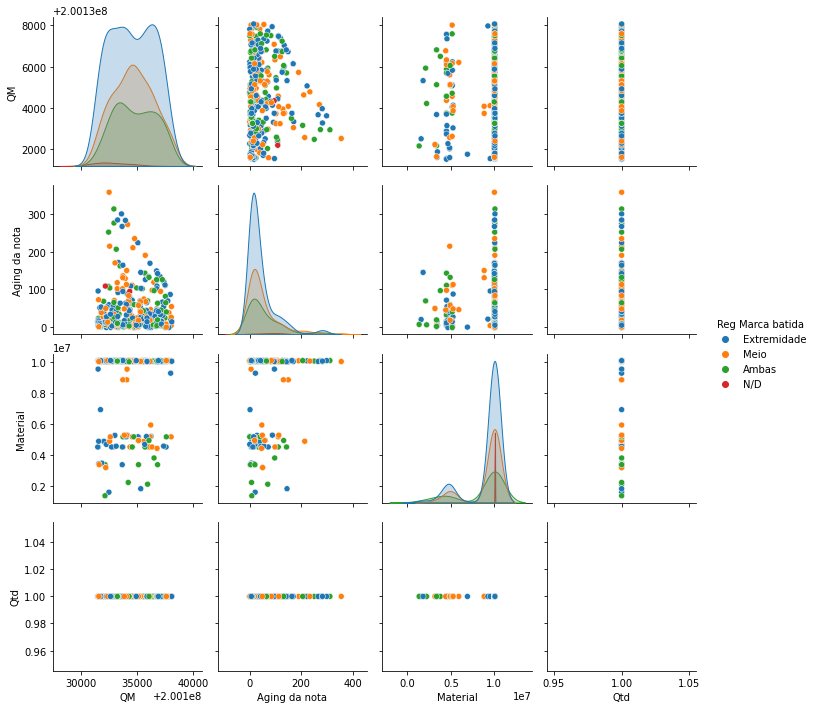

In [31]:
grafico = sns.pairplot(df,diag_kind='kde', hue='Reg Marca batida')

In [38]:
#Calculando qtd. por Material
totais = df.groupby('Reg Marca batida')['Qtd'].sum()

In [48]:
soma_qtd = df['Qtd'].sum()

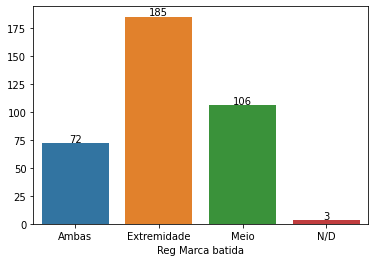

In [41]:
# criar o gráfico de barras com os totais
fig, ax = plt.subplots()
sns.barplot(x=totais.index, y=totais.values, ax=ax)

# adicionar rótulos aos dados
for i, v in enumerate(totais.values):
    ax.text(i, v+1, str(v), ha='center')

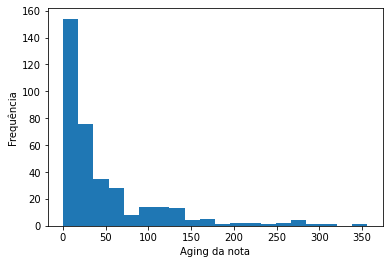

In [42]:
#Distribuição dos dados

# Criando um histograma da coluna "Aging da nota"
import matplotlib.pyplot as plt
plt.hist(df["Aging da nota"], bins=20)
plt.xlabel("Aging da nota")
plt.ylabel("Frequência")
plt.show()

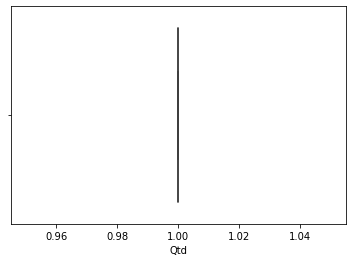

In [43]:
# Criando um boxplot da coluna "Qtd"
import seaborn as sns
sns.boxplot(x=df["Qtd"])
plt.xlabel("Qtd")
plt.show()


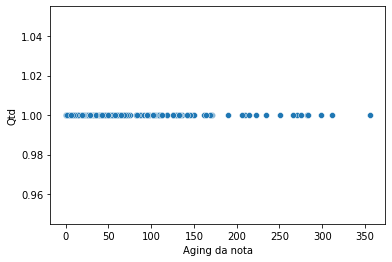

In [44]:
# Relação entre variaveis

# Criando um scatterplot entre as colunas "Aging da nota" e "Qtd"
sns.scatterplot(x="Aging da nota", y="Qtd", data=df)
plt.show()

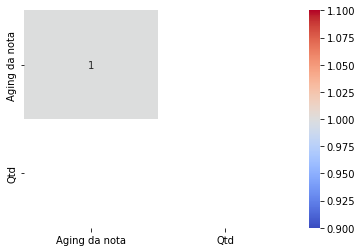

In [45]:
# Criando um heatmap de correlação entre todas as colunas numéricas
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

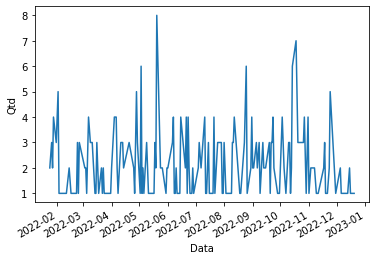

In [46]:
# Analise temporal

# Criando um gráfico de linha da evolução temporal da coluna "Qtd"
df.groupby("Emissão QM")["Qtd"].sum().plot()
plt.xlabel("Data")
plt.ylabel("Qtd")
plt.show()

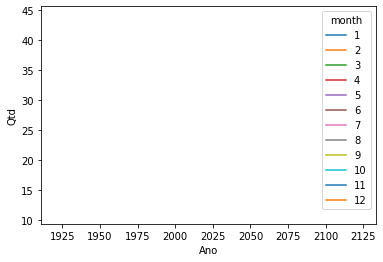

In [47]:
# Criando um heatmap de correlação entre todas as colunas numéricas
df["year"] = df["Emissão QM"].dt.year
df["month"] = df["Emissão QM"].dt.month
df.groupby(["year", "month"])["Qtd"].sum().unstack().plot()
plt.xlabel("Ano")
plt.ylabel("Qtd")
plt.show()